Iris Clustering Model

Importing Dependencies

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


Data Collection and Processing

In [199]:
dataset=pd.read_csv('./Kaggle Iris Flower Dataset/iris.csv')
#type(dataset) prints pandas.core.frame.DataFrame
print(dataset.head())
print(dataset.shape)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


In [200]:
train_dataset = dataset.drop(columns=['species'])
print(train_dataset.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Selecting the Features

1. Sepal Width and Petal Width

In [201]:
train1 = train_dataset.iloc[:,[1,3]].values
#print(train1)

In [202]:
#Choosing the number of Clusters
#WCSS: Within Clusters Sum of Squares
#Elbow method to determine the optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42,n_init='auto')
    kmeans.fit(train1)
    wcss.append(kmeans.inertia_)

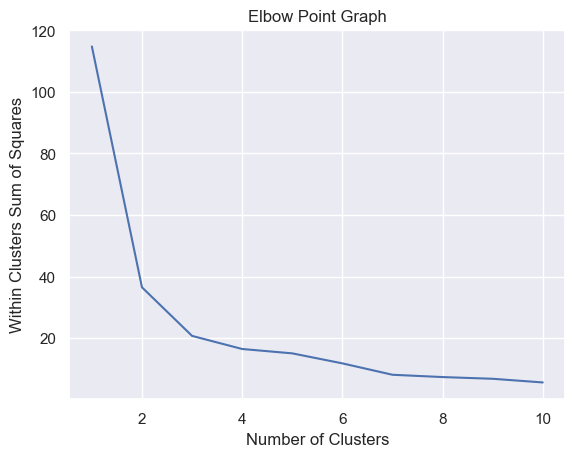

In [203]:
#Plotting the Elbow grpah to find optimum number of cluster
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.show()
#plt.show() helps in displaying the graph

From the above graph the significant drop is sign at 3. Therefore 3 is the optimum number of clusters

In [204]:
#initializing the K-Means with optimum number of clusters(3)
kmeans=KMeans(n_clusters=3,init="k-means++",n_init="auto",random_state=0)
#fitting the datapoints to the KMeans function and returning a label for each data point
Y1=kmeans.fit_predict(train1)
print(Y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Visualizing the Clusters

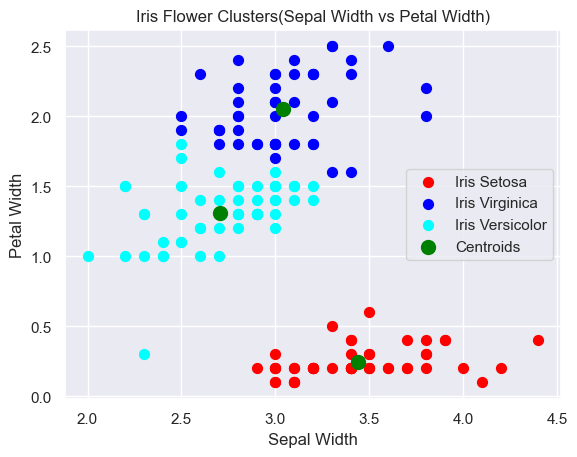

In [205]:
#scatter plot for (x,y) with label 0 as cluster 1 in red
plt.scatter(train1[Y1==0,0],train1[Y1==0,1],s=50,c='red',label="Iris Setosa")
#scatter plot for (x,y) with label 1 as cluster 2 in blue
plt.scatter(train1[Y1==1,0],train1[Y1==1,1],s=50,c='blue',label="Iris Virginica")
#scatter plot for (x,y) with label 2 as cluster 3 in cyan
plt.scatter(train1[Y1==2,0],train1[Y1==2,1],s=50,c='cyan',label="Iris Versicolor")
#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="green",label="Centroids")
plt.title("Iris Flower Clusters(Sepal Width vs Petal Width)")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

2. Sepal Length and Sepal Width

In [206]:
train2 = train_dataset.iloc[:,[0,1]].values
#print(train2)

In [207]:
#Choosing the number of Clusters
#WCSS: Within Clusters Sum of Squares
#Elbow method to determine the optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42,n_init='auto')
    kmeans.fit(train2)
    wcss.append(kmeans.inertia_)

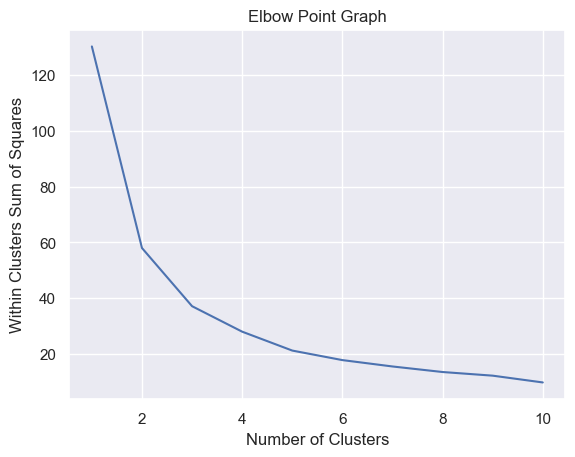

In [208]:
#Plotting the Elbow grpah to find optimum number of cluster
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.show()
#plt.show() helps in displaying the graph

From the above graph the significant drop is sign at 3. Therefore 3 is the optimum number of clusters

In [209]:
#initializing the K-Means with optimum number of clusters(3)
kmeans=KMeans(n_clusters=3,init="k-means++",n_init="auto",random_state=0)
#fitting the datapoints to the KMeans function and returning a label for each data point
Y2=kmeans.fit_predict(train2)
print(Y2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1 0 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


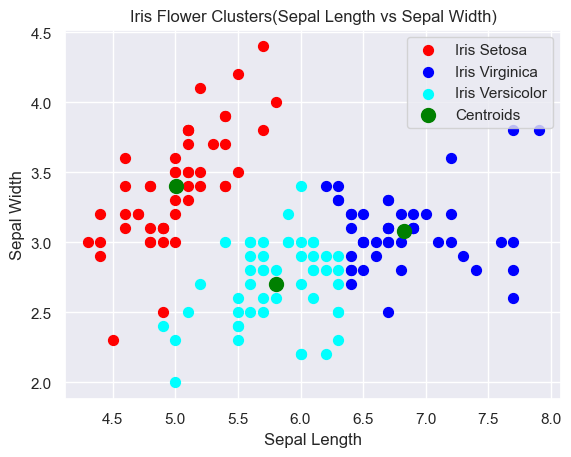

In [210]:
#scatter plot for (x,y) with label 0 as cluster 1 in red
plt.scatter(train2[Y2==0,0],train2[Y2==0,1],s=50,c='red',label="Iris Setosa")
#scatter plot for (x,y) with label 1 as cluster 2 in blue
plt.scatter(train2[Y2==1,0],train2[Y2==1,1],s=50,c='blue',label="Iris Virginica")
#scatter plot for (x,y) with label 2 as cluster 3 in cyan
plt.scatter(train2[Y2==2,0],train2[Y2==2,1],s=50,c='cyan',label="Iris Versicolor")
#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="green",label="Centroids")
plt.title("Iris Flower Clusters(Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

3. Sepal Width and Petal Length

In [211]:
train3 = train_dataset.iloc[:,[1,2]].values
#print(train3)

In [212]:
#Choosing the number of Clusters
#WCSS: Within Clusters Sum of Squares
#Elbow method to determine the optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42,n_init='auto')
    kmeans.fit(train3)
    wcss.append(kmeans.inertia_)

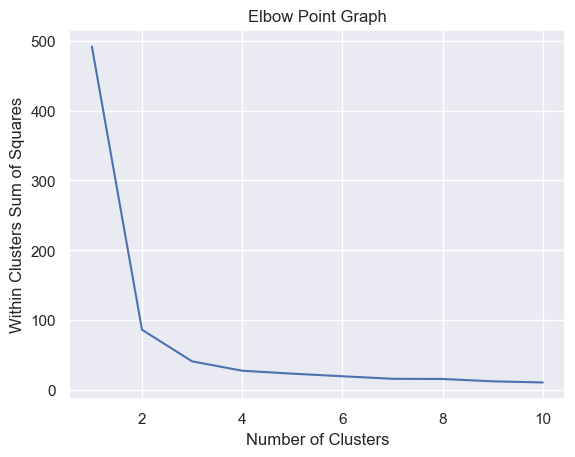

In [213]:
#Plotting the Elbow grpah to find optimum number of cluster
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.show()
#plt.show() helps in displaying the graph

From the above graph the significant drop is sign at 3. Therefore 3 is the optimum number of clusters

In [214]:
#initializing the K-Means with optimum number of clusters(3)
kmeans=KMeans(n_clusters=3,init="k-means++",n_init="auto",random_state=0)
#fitting the datapoints to the KMeans function and returning a label for each data point
Y3=kmeans.fit_predict(train3)
print(Y3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1
 1 1]


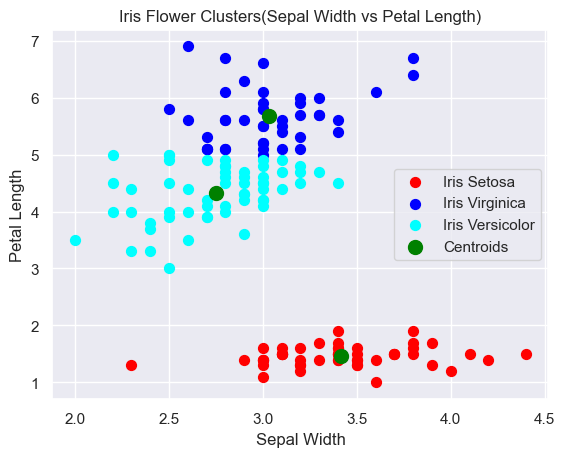

In [215]:
#scatter plot for (x,y) with label 0 as cluster 1 in red
plt.scatter(train3[Y3==0,0],train3[Y3==0,1],s=50,c='red',label="Iris Setosa")
#scatter plot for (x,y) with label 1 as cluster 2 in blue
plt.scatter(train3[Y3==1,0],train3[Y3==1,1],s=50,c='blue',label="Iris Virginica")
#scatter plot for (x,y) with label 2 as cluster 3 in cyan
plt.scatter(train3[Y3==2,0],train3[Y3==2,1],s=50,c='cyan',label="Iris Versicolor")
#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="green",label="Centroids")
plt.title("Iris Flower Clusters(Sepal Width vs Petal Length)")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

3. Sepal Length and Petal Length

In [216]:
train4 = train_dataset.iloc[:,[0,2]].values
#print(train4)

In [217]:
#Choosing the number of Clusters
#WCSS: Within Clusters Sum of Squares
#Elbow method to determine the optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42,n_init='auto')
    kmeans.fit(train4)
    wcss.append(kmeans.inertia_)

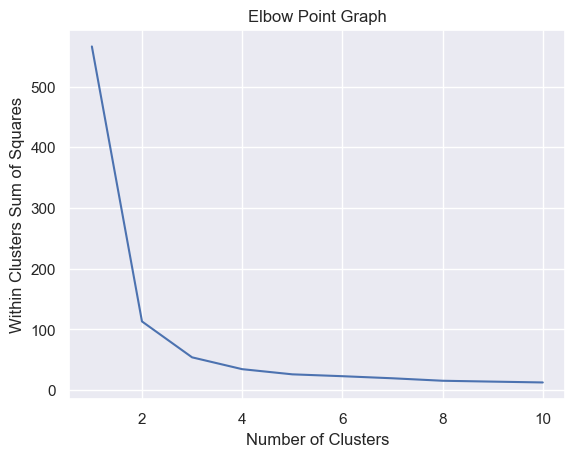

In [218]:
#Plotting the Elbow grpah to find optimum number of cluster
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.show()
#plt.show() helps in displaying the graph

From the above graph the significant drop is sign at 3. Therefore 3 is the optimum number of clusters

In [219]:
#initializing the K-Means with optimum number of clusters(3)
kmeans=KMeans(n_clusters=3,init="k-means++",n_init="auto",random_state=0)
#fitting the datapoints to the KMeans function and returning a label for each data point
Y4=kmeans.fit_predict(train4)
print(Y4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


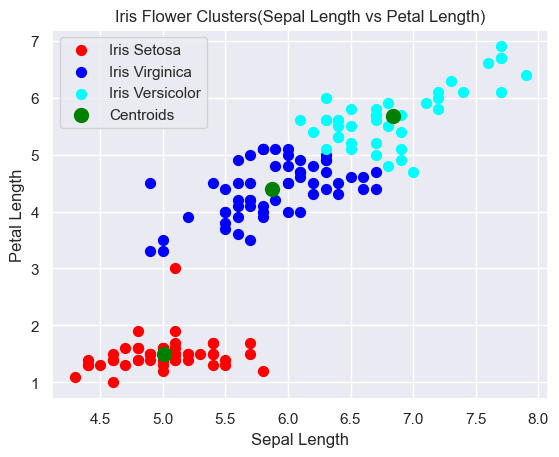

In [220]:
#scatter plot for (x,y) with label 0 as cluster 1 in red
plt.scatter(train4[Y4==0,0],train4[Y4==0,1],s=50,c='red',label="Iris Setosa")
#scatter plot for (x,y) with label 1 as cluster 2 in blue
plt.scatter(train4[Y4==1,0],train4[Y4==1,1],s=50,c='blue',label="Iris Virginica")
#scatter plot for (x,y) with label 2 as cluster 3 in cyan
plt.scatter(train4[Y4==2,0],train4[Y4==2,1],s=50,c='cyan',label="Iris Versicolor")
#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="green",label="Centroids")
plt.title("Iris Flower Clusters(Sepal Length vs Petal Length)")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

5. Sepal Length and Petal Width

In [221]:
train5 = train_dataset.iloc[:,[0,3]].values
#print(train5)

In [222]:
#Choosing the number of Clusters
#WCSS: Within Clusters Sum of Squares
#Elbow method to determine the optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42,n_init='auto')
    kmeans.fit(train5)
    wcss.append(kmeans.inertia_)

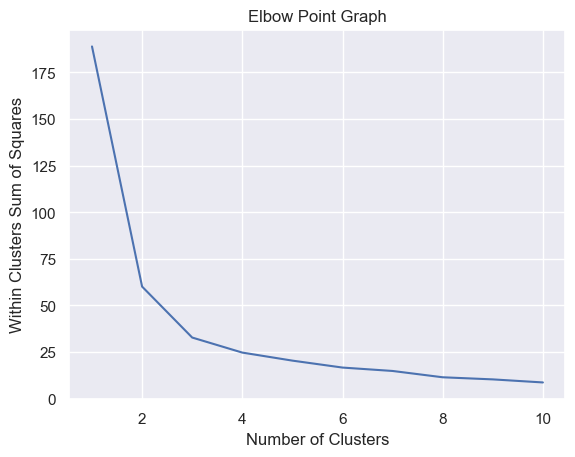

In [223]:
#Plotting the Elbow grpah to find optimum number of cluster
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.show()
#plt.show() helps in displaying the graph

From the above graph the significant drop is sign at 3. Therefore 3 is the optimum number of clusters

In [224]:
#initializing the K-Means with optimum number of clusters(3)
kmeans=KMeans(n_clusters=3,init="k-means++",n_init="auto",random_state=0)
#fitting the datapoints to the KMeans function and returning a label for each data point
Y5=kmeans.fit_predict(train5)
print(Y5)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 0 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 0 2 1 2 1 2 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 2]


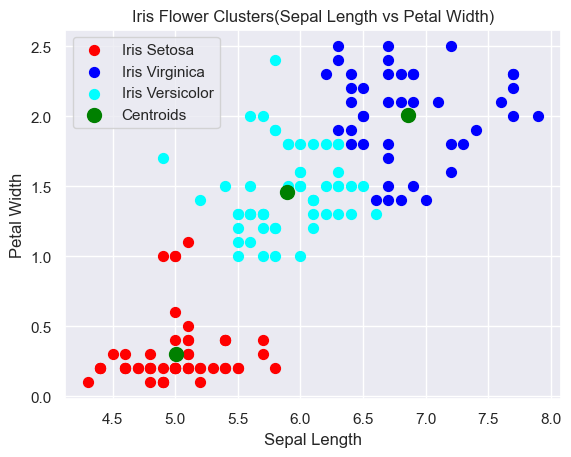

In [225]:
#scatter plot for (x,y) with label 0 as cluster 1 in red
plt.scatter(train5[Y5==0,0],train5[Y5==0,1],s=50,c='red',label="Iris Setosa")
#scatter plot for (x,y) with label 1 as cluster 2 in blue
plt.scatter(train5[Y5==1,0],train5[Y5==1,1],s=50,c='blue',label="Iris Virginica")
#scatter plot for (x,y) with label 2 as cluster 3 in cyan
plt.scatter(train5[Y5==2,0],train5[Y5==2,1],s=50,c='cyan',label="Iris Versicolor")
#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="green",label="Centroids")
plt.title("Iris Flower Clusters(Sepal Length vs Petal Width)")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

6. Petal Length and Petal Width

In [226]:
train6 = train_dataset.iloc[:,[2,3]].values
#print(train6)

In [227]:
#Choosing the number of Clusters
#WCSS: Within Clusters Sum of Squares
#Elbow method to determine the optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42,n_init='auto')
    kmeans.fit(train6)
    wcss.append(kmeans.inertia_)

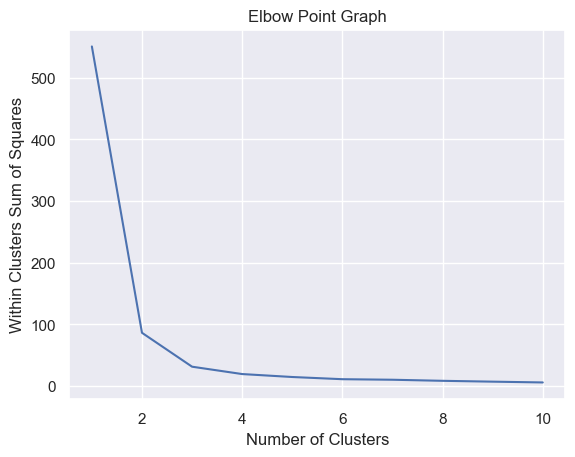

In [228]:
#Plotting the Elbow grpah to find optimum number of cluster
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.show()
#plt.show() helps in displaying the graph

From the above graph the significant drop is sign at 3. Therefore 3 is the optimum number of clusters

In [229]:
#initializing the K-Means with optimum number of clusters(3)
kmeans=KMeans(n_clusters=3,init="k-means++",n_init="auto",random_state=0)
#fitting the datapoints to the KMeans function and returning a label for each data point
Y6=kmeans.fit_predict(train6)
print(Y6)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


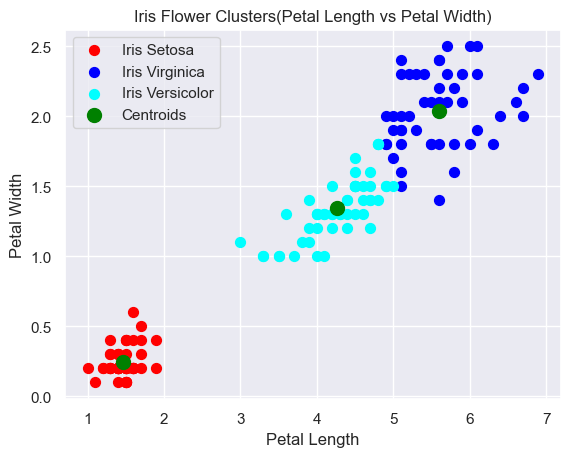

In [230]:
#scatter plot for (x,y) with label 0 as cluster 1 in red
plt.scatter(train6[Y6==0,0],train6[Y6==0,1],s=50,c='red',label="Iris Setosa")
#scatter plot for (x,y) with label 1 as cluster 2 in blue
plt.scatter(train6[Y6==1,0],train6[Y6==1,1],s=50,c='blue',label="Iris Virginica")
#scatter plot for (x,y) with label 2 as cluster 3 in cyan
plt.scatter(train6[Y6==2,0],train6[Y6==2,1],s=50,c='cyan',label="Iris Versicolor")
#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="green",label="Centroids")
plt.title("Iris Flower Clusters(Petal Length vs Petal Width)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

    From all the clustering plots, 
    I conclude that the best result is gained when we use Petal Width and Petal Length as features to plot.